### Numpy basics

In [13]:
import numpy as np
import math as mt

1\. Find the row, column and overall means for the following matrix:

```python
m = np.arange(12).reshape((3,4))
```

In [39]:
#1 senza usare le funzioni

m = np.arange(12).reshape((3,4))
#print(m)
shape = m.shape

row_m = np.zeros((shape[0],1))
col_m = np.zeros((shape[1],1))
overall_m = 0.

#media dei valori in ogni riga
for i in range(shape[0]):
    for j in range(shape[1]):
        row_m[i] += m[i,j]
row_m /= shape[1]
print("Vecor of row means:\n", row_m)

#media dei valori in ogni colonna
for i in range(shape[1]):
    for j in range(shape[0]):
        col_m[i] += m[j,i]
col_m /= shape[0]
print("Vecor of column means:\n", col_m)

#media complessiva
for i in range(shape[0]):
    for j in range(shape[1]):
        overall_m += m[i,j]
overall_m /= (shape[0]*shape[1])
print("Overall mean:", overall_m)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
Vecor of row means:
 [[1.5]
 [5.5]
 [9.5]]
Vecor of column means:
 [[4.]
 [5.]
 [6.]
 [7.]]
verall mean: 5.5


In [43]:
#1 usando le funzioni di numpy

print("Row means:\n", m.mean(axis=1))
print("Column means:\n", m.mean(axis=0))
print("Overall mean:", m.mean())


Row means:
 [1.5 5.5 9.5]
Column means:
 [4. 5. 6. 7.]
Overall mean: 5.5


2\. Find the outer product of the following two vecotrs

```python
u = np.array([1,3,5,7])
v = np.array([2,4,6,8])
```

Do this in the following ways:

   * Using the function outer in numpy
   * Using a nested for loop or list comprehension
   * Using numpy broadcasting operatoins


In [45]:
#2.a
u = np.array([1,3,5,7])
v = np.array([2,4,6,8])

w = np.outer(u,v)
#print(w)

[[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]


In [74]:
#2.b.con il for
shape_u = u.shape
shape_v = v.shape
w = np.zeros((shape_u[0],shape_v[0]))

for i in range(shape_u[0]):
    for j in range(shape_v[0]):
        w[i,j] = u[i]*v[j]
print(w)

#2.b con una lista 
z = np.array([u[i]*v[j] for i in range(shape_u[0]) for j in range(shape_v[0])]).reshape((shape_u[0],shape_v[0]))
print(z)

[[ 2.  4.  6.  8.]
 [ 6. 12. 18. 24.]
 [10. 20. 30. 40.]
 [14. 28. 42. 56.]]
[[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]


In [89]:
#2.3
u_t = np.array([u]).T #traspone il primo vettore

print("Matrix created by broadcasting:\n", u_t*v)

Matrix created by broadcasting:
 [[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]


3\. Create a 10 by 6 matrix of random uniform numbers. Set all rows with any entry less than 0.1 to be zero

Hint: Use the following numpy functions - np.random.random, np.any as well as Boolean indexing and the axis argument.

In [11]:
#3
import numpy as np

#array di numeri random
m = np.random.random((10,6))

#maschera con le righe che soddisfano la condizione "almeno un elmento della riga è < 0.1"
mask = np.any(m < 0.1, axis=1)

#arry modificato
m[mask] = 0
print(m)

[False False False  True  True  True  True False  True False]
[[0.46574891 0.8190779  0.1683615  0.47635169 0.88800365 0.66183868]
 [0.30942117 0.40547531 0.70233856 0.45686663 0.67982297 0.76045725]
 [0.88674282 0.66309658 0.86389056 0.41912389 0.90311387 0.7446081 ]
 [0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.        ]
 [0.87408629 0.73929128 0.71087864 0.75047368 0.45668758 0.37855716]
 [0.         0.         0.         0.         0.         0.        ]
 [0.2362864  0.7425631  0.77583708 0.66030548 0.18546182 0.60320594]]


4\. Use np.linspace to create an array of 100 numbers between 0 and 2π (includsive).

  * Extract every 10th element using slice notation
  * Reverse the array using slice notation
  * Extract elements where the absolute difference between the sine and cosine functions evaluated at that element is less than 0.1
  * Make a plot showing the sin and cos functions and indicate where they are close

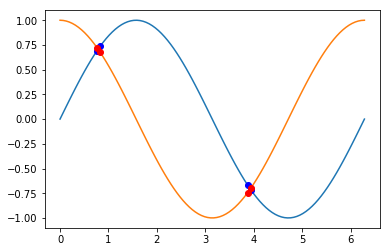

In [49]:
import matplotlib.pyplot as plt # everybody imports it that way

#Create the array
a = np.linspace(0,2*mt.pi,100)
#Extract every 10th element using slice notation
b = a[::10]

#Reverse the array using slice notation
c = a[::-1]
#print(c)
mask = np.array([abs(np.sin(c) - np.cos(c)) < 0.1],dtype = bool)
points = c[mask[0]]
#print(points)


%matplotlib inline 

plt.plot(c,np.sin(c))
plt.plot(c,np.cos(c))
plt.plot(points,np.sin(points), 'bo')
plt.plot(points,np.cos(points), 'ro')

5\. Create a matrix that shows the 10 by 10 multiplication table.

 * Find the trace of the matrix
 * Extract the anto-diagonal (this should be ```array([10, 18, 24, 28, 30, 30, 28, 24, 18, 10])```)
 * Extract the diagnoal offset by 1 upwards (this should be ```array([ 2,  6, 12, 20, 30, 42, 56, 72, 90])```)

In [87]:
mult_tab = np.fromfunction(lambda i, j: (i+1)*(j+1), (10,10))
#print(mult_tab)
#Find the trace of the matrix
trace = np.trace(mult_tab)
print("Trace of the multiplication table matrix:", trace)

#Extract the anto-diagonal
anti_mult_tab = mult_tab[::-1,]
anti_diag = anti_mult_tab.diagonal()
print("The anti diagonal is:",anti_diag)

#Extract the diagonal offset by 1 upwards
offset = mult_tab[([i for i in range(0,9)]),([j for j in range(1,10)])]
print("The diagonal offset array is:",offset)


Trace of the multiplication table matrix: 385.0
The anti diagonal is: [10. 18. 24. 28. 30. 30. 28. 24. 18. 10.]
The diagonal offset array is: [ 2.  6. 12. 20. 30. 42. 56. 72. 90.]


6\. Use broadcasting to create a grid of distances

Route 66 crosses the following cities in the US: Chicago, Springfield, Saint-Louis, Tulsa, Oklahoma City, Amarillo, Santa Fe, Albuquerque, Flagstaff, Los Angeles
The corresponding positions in miles are: 0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448

  * Construct a 2D grid of distances among each city along Route 66
  * Convert that in km (those savages...)

In [100]:
distances = np.array([0,198,303,736,871,1175,1475,1544,1913,448])
grid = np.array(abs(distances-np.array([distances]).T))
print("Matrix of the distances in miles:\n", grid)
grid_km = (grid * 1.609344)
print("Matrix of the distances in km:\n", grid_km)


Matrix of the distances in miles:
 [[   0  198  303  736  871 1175 1475 1544 1913  448]
 [ 198    0  105  538  673  977 1277 1346 1715  250]
 [ 303  105    0  433  568  872 1172 1241 1610  145]
 [ 736  538  433    0  135  439  739  808 1177  288]
 [ 871  673  568  135    0  304  604  673 1042  423]
 [1175  977  872  439  304    0  300  369  738  727]
 [1475 1277 1172  739  604  300    0   69  438 1027]
 [1544 1346 1241  808  673  369   69    0  369 1096]
 [1913 1715 1610 1177 1042  738  438  369    0 1465]
 [ 448  250  145  288  423  727 1027 1096 1465    0]]
Matrix of the distances in km:
 [[   0.        318.650112  487.631232 1184.477184 1401.738624 1890.9792
  2373.7824   2484.827136 3078.675072  720.986112]
 [ 318.650112    0.        168.98112   865.827072 1083.088512 1572.329088
  2055.132288 2166.177024 2760.02496   402.336   ]
 [ 487.631232  168.98112     0.        696.845952  914.107392 1403.347968
  1886.151168 1997.195904 2591.04384   233.35488 ]
 [1184.477184  865.827072  69

7\. Prime numbers sieve: compute the prime numbers in the 0-N (N=99 to start with) range with a sieve (mask).
  * Constract a shape (100,) boolean array, the mask
  * Identify the multiples of each number starting from 2 and set accordingly the corresponding mask element
  * Apply the mask to obtain an array of ordered prime numbers
  * Check the performances (timeit); how does it scale with N?
  * Implement the optimization suggested in the [sieve of Eratosthenes](https://en.wikipedia.org/wiki/Sieve_of_Eratosthenes)

8\. Diffusion using random walk

Consider a simple random walk process: at each step in time, a walker jumps right or left (+1 or -1) with equal probability. The goal is to find the typical distance from the origin of a random walker after a given amount of time. 
To do that, let's simulate many walkers and create a 2D array with each walker as a raw and the actual time evolution as columns

  * Take 1000 walkers and let them walk for 200 steps
  * Use randint to create a 2D array of size walkers x steps with values -1 or 1
  * Build the actual walking distances for each walker (i.e. another 2D array "summing on each raw")
  * Take the square of that 2D array (elementwise)
  * Compute the mean of the squared distances at each step (i.e. the mean along the columns)
  * Plot the average distances (sqrt(distance\*\*2)) as a function of time (step)
  
Did you get what you expected?

9\. Analyze a data file 
  * Download the population of hares, lynxes and carrots at the beginning of the last century.
    ```python
    ! wget https://www.dropbox.com/s/3vigxoqayo389uc/populations.txt
    ```

  * Check the content by looking within the file
  * Load the data (use an appropriate numpy method) into a 2D array
  * Create arrays out of the columns, the arrays being (in order): *year*, *hares*, *lynxes*, *carrots* 
  * Plot the 3 populations over the years
  * Compute the main statistical properties of the dataset (mean, std, correlations, etc.)
  * Which species has the highest population each year?

Do you feel there is some evident correlation here? [Studies](https://www.enr.gov.nt.ca/en/services/lynx/lynx-snowshoe-hare-cycle) tend to believe so.